# Customer Segmentation and Analysis
Steps to solve the problem :
* Importing Libraries.
* Exploration of data.
* Data Visualization.
* Clustering using K-Means and other Clustering Algorithms.
* Selection of Clusters.
* Ploting the Cluster Boundry and Clusters.
* 3D Plot of Clusters.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AffinityPropagation, MeanShift, MiniBatchKMeans

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


In [2]:
df = pd.read_csv('dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df['Gender2'] = df['Gender'].map({'Female' : 0 , 'Male' : 1})

# Data Visualization

In [8]:
plt.style.use('fivethirtyeight')

## Histogram

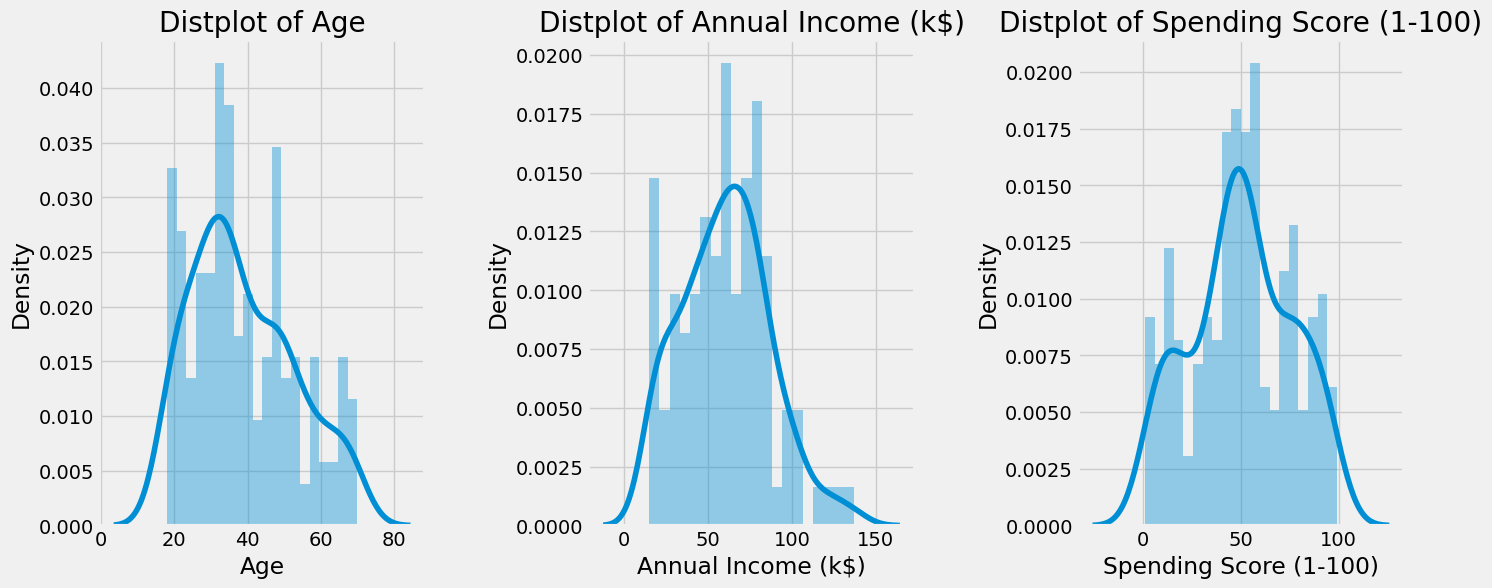

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title(f'Distplot of {x}')
plt.show()

## Count Plot of Gender

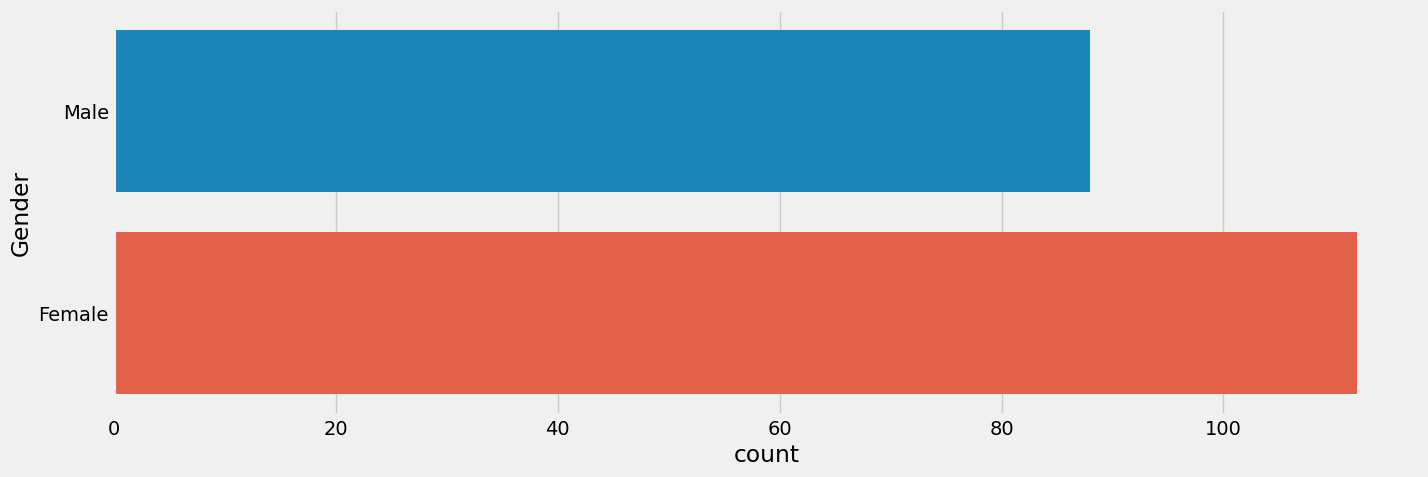

In [10]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df, hue='Gender')
plt.show()

Ploting the Relation between Age , Annual Income and Spending Score

In [11]:
df2 = df.drop(['CustomerID' , 'Gender'] , axis = 1)

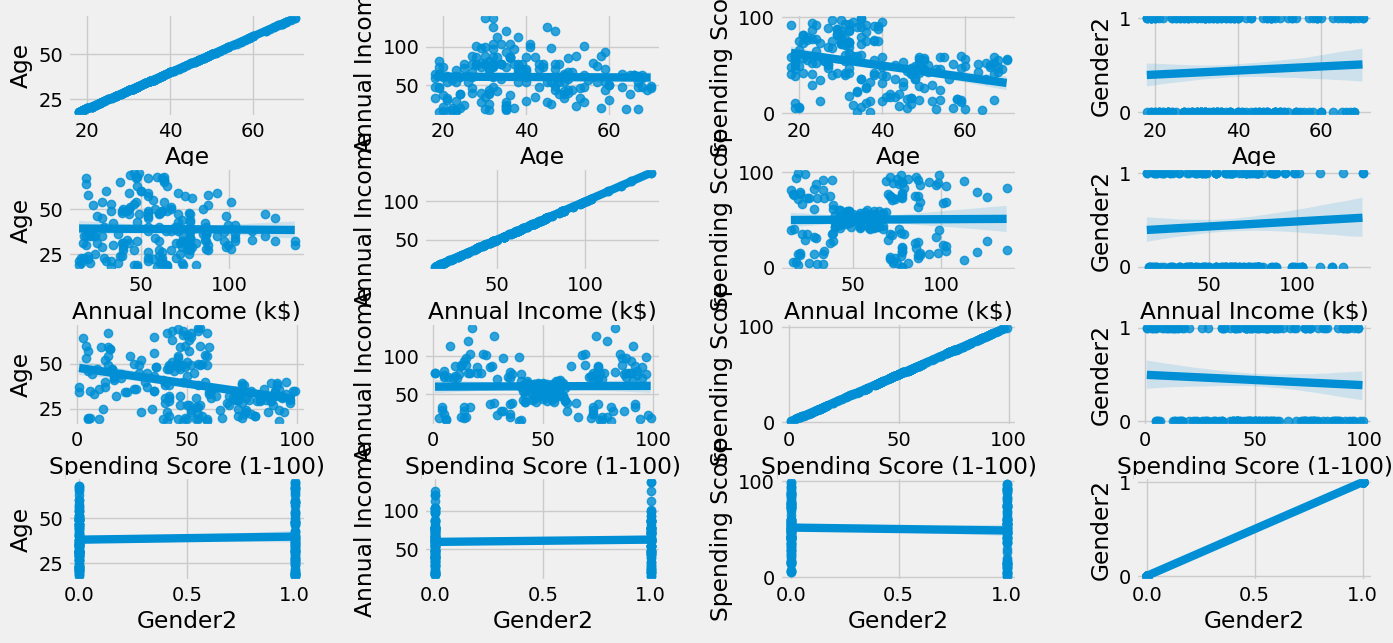

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in df2.columns:
    for y in df2.columns:
        n += 1
        plt.subplot(len(df2.columns) , len(df2.columns) , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [13]:
df2.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender2
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Gender2,0.060867,0.056410,-0.058109,1.000000


<Axes: >

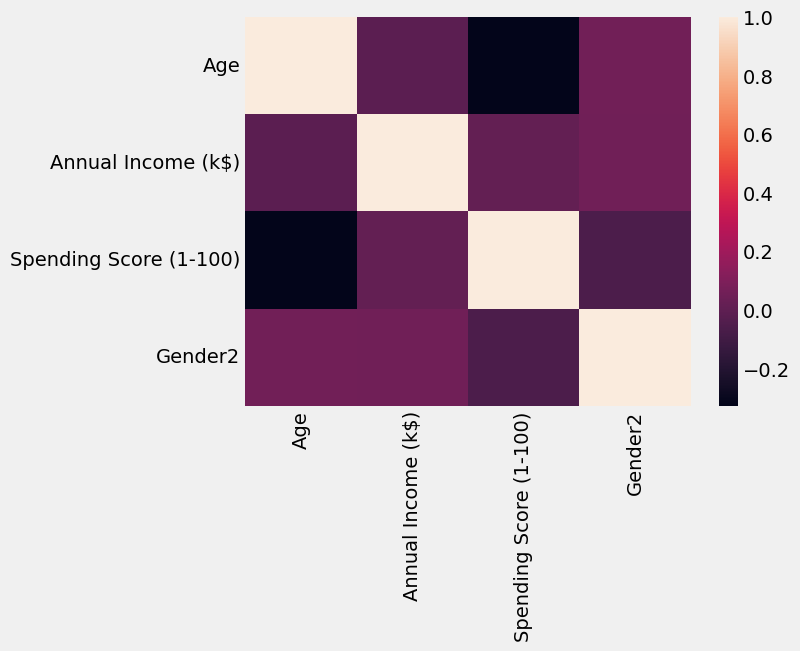

In [14]:
sns.heatmap(df2.corr())

I must say it makes good sense to see negative correlation between Age and Spending Score, People with greater age spend less (wisdom speaks)

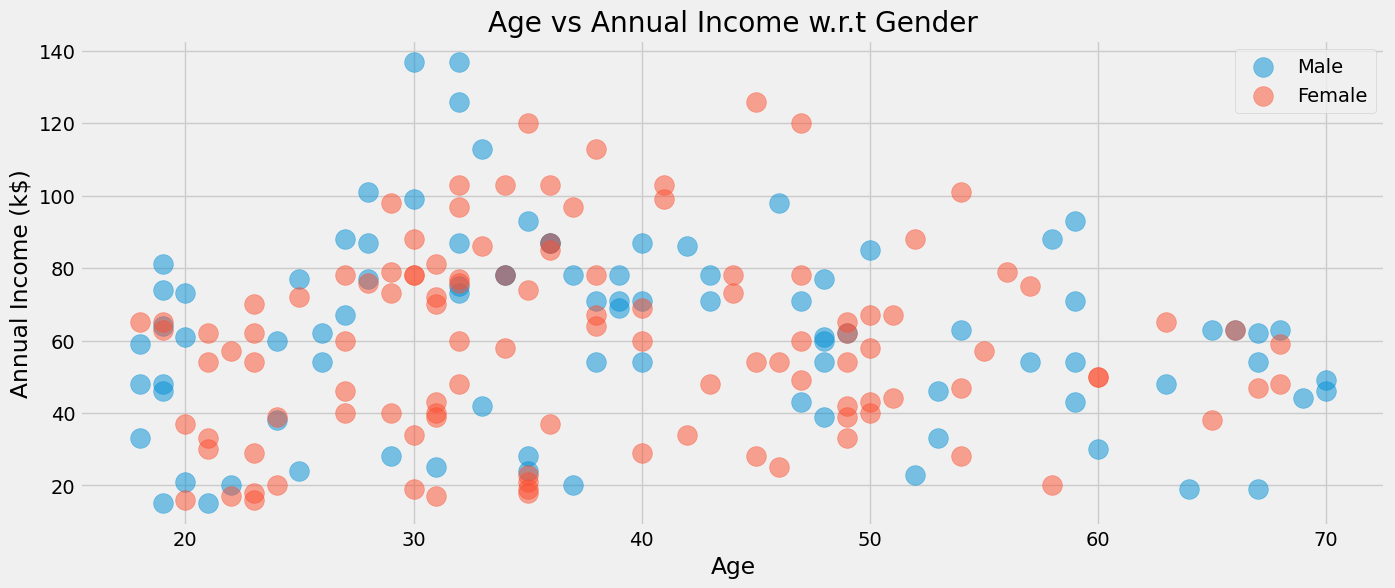

In [15]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

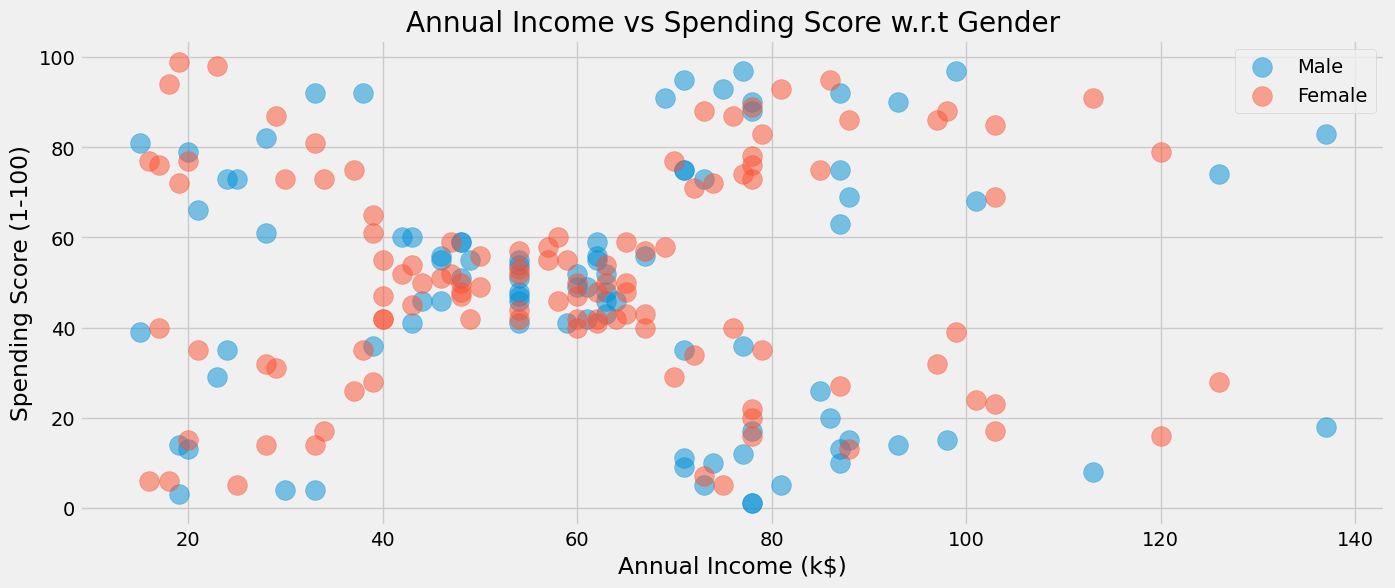

In [16]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

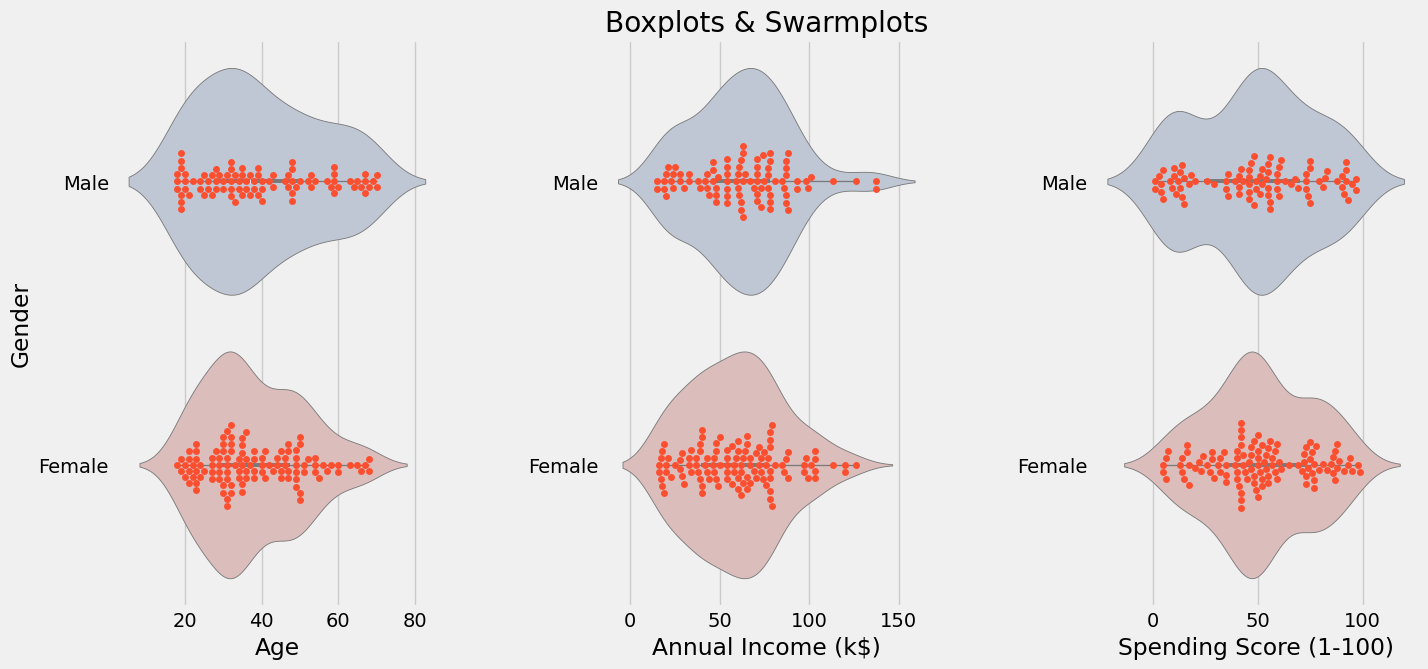

In [17]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Model Building

try it all

In [18]:
from pycaret.clustering import *

In [19]:
df = df.drop(['CustomerID', 'Gender2'] , axis = 1)

In [20]:
dff = setup(df, normalize = True, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 4)"
2,Transformed data shape,"(200, 4)"
3,Ordinal features,1
4,Numeric features,3
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


        * 'kmeans' - K-Means Clustering
        * 'ap' - Affinity Propagation
        * 'meanshift' - Mean shift Clustering
        * 'sc' - Spectral Clustering
        * 'hclust' - Agglomerative Clustering
        * 'dbscan' - Density-Based Spatial Clustering
        * 'optics' - OPTICS Clustering
        * 'birch' - Birch Clustering
        * 'kmodes' - K-Modes Clustering


In [21]:
model_names = ['kmeans', 'ap', 'meanshift', 'sc', 'hclust', 'dbscan','optics','birch'] #,'kmodes']

In [27]:
x = df2.values

In [28]:

# class ClusterAnalyzer:
#     def __init__(self, X, range_n_clusters):
#         self.X = X
#         self.range_n_clusters = range_n_clusters

#     def analyze_clusters(self, cluster_model):
#         for n_clusters in self.range_n_clusters:
#             # Create a subplot with 1 row and 2 columns
#             fig, (ax1, ax2) = plt.subplots(1, 2)
#             fig.set_size_inches(18, 7)

#             # The 1st subplot is the silhouette plot
#             ax1.set_xlim([-0.1, 1])
#             ax1.set_ylim([0, len(self.X) + (n_clusters + 1) * 10])

#             cluster_labels = cluster_model(self.X, n_clusters)

#             silhouette_avg = silhouette_score(self.X, cluster_labels)
#             print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

#             sample_silhouette_values = silhouette_samples(self.X, cluster_labels)

#             y_lower = 10
#             for i in range(n_clusters):
#                 ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

#                 ith_cluster_silhouette_values.sort()

#                 size_cluster_i = ith_cluster_silhouette_values.shape[0]
#                 y_upper = y_lower + size_cluster_i

#                 color = cm.nipy_spectral(float(i) / n_clusters)
#                 ax1.fill_betweenx(
#                     np.arange(y_lower, y_upper),
#                     0,
#                     ith_cluster_silhouette_values,
#                     facecolor=color,
#                     edgecolor=color,
#                     alpha=0.7,
#                 )

#                 ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#                 y_lower = y_upper + 10

#             ax1.set_title("The silhouette plot for the various clusters.")
#             ax1.set_xlabel("The silhouette coefficient values")
#             ax1.set_ylabel("Cluster label")
#             ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
#             ax1.set_yticks([])
#             ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#             colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#             ax2.scatter(
#                 self.X[:, 0], self.X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
#             )

#             centers = self.get_cluster_centers(cluster_labels, n_clusters)
#             ax2.scatter(
#                 centers[:, 0],
#                 centers[:, 1],
#                 marker="o",
#                 c="white",
#                 alpha=1,
#                 s=200,
#                 edgecolor="k",
#             )

#             for i, c in enumerate(centers):
#                 ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

#             ax2.set_title("The visualization of the clustered data.")
#             ax2.set_xlabel("Feature space for the 1st feature")
#             ax2.set_ylabel("Feature space for the 2nd feature")

#             plt.suptitle(
#                 f"Silhouette analysis for clustering with {n_clusters} clusters",
#                 fontsize=14,
#                 fontweight="bold",
#             )

#             plt.show()

#     def get_cluster_centers(self, cluster_labels, n_clusters):
#         centers = []
#         for i in range(n_clusters):
#             cluster_points = self.X[cluster_labels == i]
#             cluster_center = np.mean(cluster_points, axis=0)
#             centers.append(cluster_center)
#         return np.array(centers)


# def kmeans_cluster(X, n_clusters):
#     clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
#     return clusterer.fit_predict(X)

# def dbscan_cluster(X, eps):
#     dbscan = DBSCAN(eps=eps, min_samples=5)
#     return dbscan.fit_predict(X)

# def mini_batch_kmeans_cluster(X, n_clusters):
#     dbscan = MiniBatchKMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, batch_size=1024, verbose=0, compute_labels=True, tol=0.0, max_no_improvement=10, n_init='warn', reassignment_ratio=0.01)
#     return dbscan.fit_predict(X)


In [33]:
# X = df2.values
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# epss = np.linspace(0.5, 0.999, 10).tolist()
# analyzer = ClusterAnalyzer(X, range_n_clusters)
# analyzer2 = ClusterAnalyzer(X, epss)
# # analyzer.analyze_clusters(kmeans_cluster
# # analyzer.analyze_clusters(mini_batch_kmeans_cluster)

In [55]:
# analyzer2.analyze_clusters(dbscan_cluster)

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import itertools


def plot_silhouette(name, cluster_labels, x):
    # Compute silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(f"{name} - Silhouette Score: {silhouette_avg:.2f}")

    # Compute silhouette values for each data point
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(cluster_labels.max() + 1):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Spectral(float(i) / cluster_labels.max())
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title(f"Silhouette plot for {name}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.xlim(-0.1, 1)

    



In [79]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# List of clustering algorithms to test
clustering_algorithms = [
    ("K-Means", KMeans(n_clusters=4, random_state=42)),
    ("DBSCAN", DBSCAN(eps=0.4, min_samples=5)),
    ("Affinity Propagation", AffinityPropagation(damping=0.9))
]



K-Means - Silhouette Score: 0.30
K-Means - Silhouette Score: 0.30
K-Means - Silhouette Score: 0.30
DBSCAN - Silhouette Score: -0.21
Affinity Propagation - Silhouette Score: 0.41


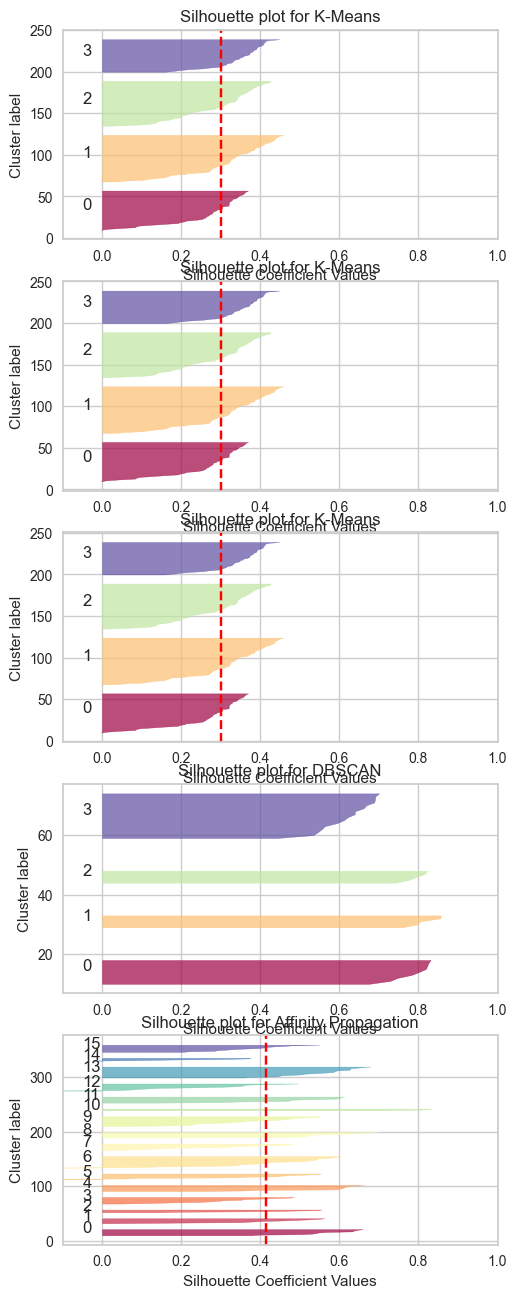

In [83]:
# Create subplots for each algorithm
plt.figure(figsize=(5, 15))
plot_num = 1

for name, algorithm in clustering_algorithms:
    plt.subplot(len(clustering_algorithms), 1, plot_num)
    
#     if plot_num == 2:
#         break
    algorithm.fit(x_scaled)
    cluster_labels = algorithm.labels_
    plot_silhouette(name, cluster_labels, x_scaled)
    plot_num += 1

## Silhouette Plot

Silhouette Coefficient:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [23]:
plot_model(kmeans, plot = 'silhouette')

NameError: name 'kmeans' is not defined

Silhouette is a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. In other words, the silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

## Distribution Plot

In [ ]:
plot_model(kmeans, plot = 'distribution')

The distribution plot shows the size of each cluster. When hovering over the bars you will see the number of samples assigned to each cluster. From the example above, we can observe that cluster 3 has the highest number of samples. We can also use the distribution plot to see the distribution of cluster labels in association with any other numeric or categorical feature. See an example below:

In [ ]:
cols= ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
for col in cols:
    plot_model(kmeans, plot = 'distribution', feature = col)

Apart from Annual Income, other distributions are distinguishable from each other.

# Predict

In [ ]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.



In this example the silhouette analysis is used to choose an optimal value for n_clusters. 
The silhouette plot shows that the n_clusters value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters
with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4.

How do we choose the number of clusters?

1. Good Girth(width) 
    : Should have similar width for all this clusters. shows datapoints are equally spread among the clusters(all clusters have similar number of datapoints)
    
2. Good height(height) 
    : should cross the average value. (cluster has certain distance from other clusters)
    
3. Silhoutte score 
    : Bigger the better

So finally we got 6 clusters.

In [ ]:
from sklearn.cluster import 

# Affinity Propagation

In [ ]:

# Perform Affinity Propagation clustering
af = AffinityPropagation(damping=0.7)
cluster_labels = af.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

# Compute the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the y-axis labels/ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

# Labeling the clusters
for cluster_num in range(n_clusters):
    cluster_center = af.cluster_centers_[cluster_num]
    ax2.scatter(
        cluster_center[0],
        cluster_center[1],
        marker="$%d$" % cluster_num,
        alpha=1,
        s=200,
        edgecolor="k",
    )

ax2.set_title("Cluster visualization")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.suptitle(
    f"Silhouette analysis for Affinity Propagation clustering\n"
    f"Number of clusters = {n_clusters}, Silhouette Score = {silhouette_avg:.2f}",
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [ ]:
from itertools import product


In [ ]:

# Generating sample data
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Define a range of values for damping and preference
damping_values = np.linspace(0.5, 0.99, 6)
preference_values = [-50, -20, -10, -5, -2]

# Create a grid of parameter combinations
parameter_combinations = list(product(damping_values, preference_values))

# Initialize lists to store results
silhouette_scores = []
cluster_labels_list = []

# Perform Affinity Propagation clustering for each parameter combination
for damping, preference in parameter_combinations:
    af = AffinityPropagation(damping=damping, preference=preference)
    cluster_labels = af.fit_predict(X)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    silhouette_scores.append(silhouette_avg)
    cluster_labels_list.append(cluster_labels)

# Find the best parameter combination based on silhouette score
best_index = np.argmax(silhouette_scores)
best_damping, best_preference = parameter_combinations[best_index]
best_cluster_labels = cluster_labels_list[best_index]
best_silhouette_score = silhouette_scores[best_index]

# Visualize the best clustering result
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_cluster_labels, cmap=plt.cm.nipy_spectral, s=50)
plt.title(f"Best Affinity Propagation Clustering (Damping={best_damping}, Preference={best_preference})\nSilhouette Score={best_silhouette_score:.2f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Mean Shift

In [ ]:
from sklearn.cluster import AffinityPropagation, MeanShift, estimate_bandwidth

In [ ]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=10, n_jobs=-1)

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)

In [ ]:
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

In [ ]:
plt.figure(1)
plt.clf()

for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1])
    plt.scatter(
        cluster_center[0],
        cluster_center[1],
        color = 'black'
    )
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()